In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('words')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from textblob import TextBlob

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Scrapping the tweets of P.M Narendra Modi

In [2]:
import snscrape.modules.twitter as sntwitter
query = "(from:narendramodi) until:2022-12-01 since:2022-01-01 lang:en"
tweets = []
limit=10000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

C:\Users\sunny\AppData\Local\Temp\ipykernel_14492\2364767732.py:13: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
C:\Users\sunny\AppData\Local\Temp\ipykernel_14492\2364767732.py:13: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                          Date          User  \
0    2022-11-30 11:48:35+00:00  narendramodi   
1    2022-11-30 09:58:55+00:00  narendramodi   
2    2022-11-30 09:57:49+00:00  narendramodi   
3    2022-11-30 09:57:00+00:00  narendramodi   
4    2022-11-29 15:02:24+00:00  narendramodi   
...                        ...           ...   
2217 2022-01-01 08:01:09+00:00  narendramodi   
2218 2022-01-01 01:35:09+00:00  narendramodi   
2219 2022-01-01 01:25:24+00:00  narendramodi   
2220 2022-01-01 01:24:53+00:00  narendramodi   
2221 2022-01-01 01:23:42+00:00  narendramodi   

                                                  Tweet  
0     Manipur is known for its vibrant culture. Best...  
1     I call upon all #ExamWarriors, their parents a...  
2     A very encouraging trend. Happy to see this ch...  
3     Looks great! And, with the new airport and fli...  
4     Excellent news! @GeM_India is a game changer w...  
...                                                 ...  
2217  Releasing t

In [3]:
df[["Tweet"]]

,Tweet
0,Manipur is known for its vibrant culture. Best...
1,"I call upon all #ExamWarriors, their parents a..."
2,A very encouraging trend. Happy to see this ch...
3,"Looks great! And, with the new airport and fli..."
4,Excellent news! @GeM_India is a game changer w...
...,...
2217,Releasing the 10th instalment under PM-KISAN s...
2218,Extremely saddened by the loss of lives due to...
2219,Greetings to our energetic Cabinet colleague S...
2220,Birthday wishes to Manipur’s dynamic Chief Min...


Calculating the frequency of the tweets made by P.M NArendra Modi each month

In [4]:
#Adding a new column month
df["month"]=pd.DatetimeIndex(df['Date']).month
df_sorted=df.sort_values('Date',ascending=True)
df_sorted

,Date,User,Tweet,month
2221,2022-01-01 01:23:42+00:00,narendramodi,Happy 2022! \n\nMay this year bring abundance ...,1
2220,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1
2219,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1
2218,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1
2217,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1
...,...,...,...,...
4,2022-11-29 15:02:24+00:00,narendramodi,Excellent news! @GeM_India is a game changer w...,11
3,2022-11-30 09:57:00+00:00,narendramodi,"Looks great! And, with the new airport and fli...",11
2,2022-11-30 09:57:49+00:00,narendramodi,A very encouraging trend. Happy to see this ch...,11
1,2022-11-30 09:58:55+00:00,narendramodi,"I call upon all #ExamWarriors, their parents a...",11


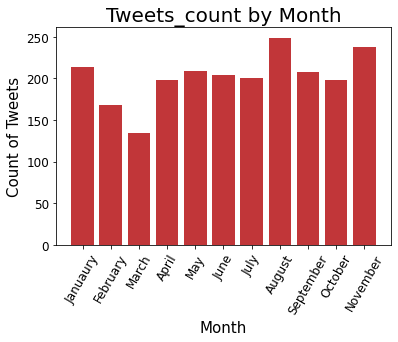

In [24]:
df_tweet_count=df_sorted.groupby("month").agg(tweet_count=('Tweet','count'))
month_name=["Januaury","February","March","April","May","June","July","August","September","October","November"]
df_tweet_count['Month_Name']=month_name
sns.set_palette("RdBu")
plt.bar(df_tweet_count.Month_Name,df_tweet_count.tweet_count)
plt.title("Tweets_count by Month" ,fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count of Tweets",fontsize=15)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)

plt.show()

C:\Users\sunny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

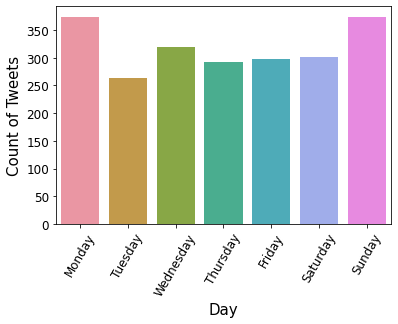

In [25]:
df_day=df['Date'].to_frame()
df_day['Day of week']=df_day['Date'].dt.day_name()
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(df_day['Day of week'],order=day_order)
plt.xlabel("Day",fontsize=15)
plt.ylabel("Count of Tweets",fontsize=15)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)

Splitting each tweet sentence into words

In [26]:
df_tweet=df[["Tweet"]]
sentences=[]
for index,row in df_tweet.iterrows():
    sentences.append(row["Tweet"])
words=[]
for i in sentences:
    word=i.split()
    for w in word:
        words.append(w)
print(words)

['Manipur', 'is', 'known', 'for', 'its', 'vibrant', 'culture.', 'Best', 'wishes', 'on', 'the', 'occasion', 'of', 'Sangai', 'Festival.', 'https://t.co/OUwyw8T0hR', 'I', 'call', 'upon', 'all', '#ExamWarriors,', 'their', 'parents', 'and', 'teachers', 'to', 'take', 'part', 'in', 'these', 'interesting', 'activities', 'relating', 'to', 'Pariksha', 'Pe', 'Charcha', '2023.', 'Let', 'us', 'collectively', 'work', 'towards', 'creating', 'a', 'stress', 'free', 'environment', 'for', 'our', 'students.', '#PPC2023', 'A', 'very', 'encouraging', 'trend.', 'Happy', 'to', 'see', 'this', 'change.', 'Our', 'emphasis', 'on', 'furthering', 'all', 'aspects', 'relating', 'to', 'women', 'empowerment', 'remains', 'very', 'strong.', 'Looks', 'great!', 'And,', 'with', 'the', 'new', 'airport', 'and', 'flights', 'being', 'added,', 'more', 'people', 'will', 'be', 'able', 'to', 'visit', 'Arunachal', 'Pradesh', 'with', 'ease', 'and', 'experience', 'the', 'warm', 'hospitality', 'there.', 'Excellent', 'news!', '@GeM_Indi

P.M Modi tagged whom in his tweet the most

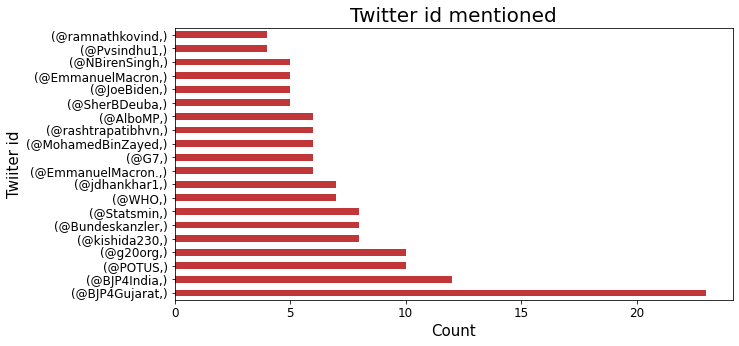

Numner of Twitter id tagged in the tweet 318


In [37]:
mentions=[]
for i in words:
    if i[0]=="@":
        mentions.append(i)
#Cleaning the twiiter id mentioned 
punc='[_!#$%^&*()<>?/\|}{~:]'
mentions_clean=[]
for i in mentions:
    word=""
    for j in range(0,len(i)):
        if i[j] not in punc:
            word=word+i[j]
    mentions_clean.append(word)
df_mentions=pd.DataFrame(mentions_clean,columns=["Twitter id"])
df_mentions_count=df_mentions.value_counts()
sns.set_palette("RdBu")
plt.figure(figsize = (10,5))
df_mentions_count[0:20].plot(kind='barh')
plt.xlabel('Count',fontsize=15)
plt.ylabel('Twiiter id',fontsize=15)
plt.title('Twitter id mentioned',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
l=df_mentions['Twitter id'].unique()
print('Numner of Twitter id tagged in the tweet {0}'.format(len(l)))

P.M Modi talked on which trend the most or which hashtag was used by him most

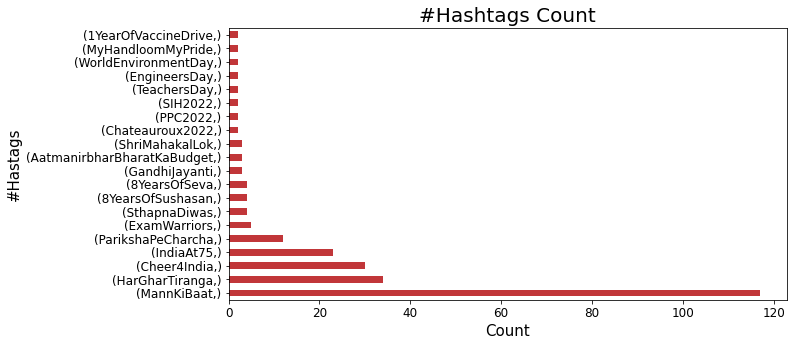

Number of unique hastags used by P.M in his tweets 65


In [39]:
Hashtags=[]
for i in words:
    if i[0]=="#":
        Hashtags.append(i)
#Removing punctuations 
punc='[_!#$%^&*()<>?/\|}{~:,.'
clean_Hashtags=[]
for i in Hashtags:
    tag=""
    for j in range(0,len(i)):
        if i[j] not in punc:
            tag=tag+i[j]
    clean_Hashtags.append(tag)
df_hashtags=pd.DataFrame(clean_Hashtags,columns=["Hashtags"])
df_hashtags_count=df_hashtags.value_counts()
plt.figure(figsize = (10,5))
df_hashtags_count[0:20].plot(kind='barh')
plt.title('#Hashtags Count',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('#Hastags',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
l=df_hashtags['Hashtags'].unique()
print('Number of unique hastags used by P.M in his tweets {0}'.format(len(l)))

Cleaning words

In [40]:
a="ayush134@fhgehsgwen"

In [41]:
#Removing the links from the data
words_1=[]
for i in words:
    if i[0:5]!="https":
        words_1.append(i)
#Removing the hastags from the data 
words_2=[]
for i in words_1:
    if i[0]!="#":
        words_2.append(i)
#Removing the punctuation from the data 
import re
words_3=[]
for i in words_2:
    w=""
    w=re.sub(r'[^A-Za-z0-9]+','',i)
    words_3.append(w)
#Removing the data from the data 
words_4=[]
for i in words_3:
    if i.isalnum()==True:
        words_4.append(i)
#Removing the word that does not have any english meaning (Hinglish words)
import nltk
nltk.download('words')
clean_words=[]
words=set(nltk.corpus.words.words())
for i in words_4:
    if i.lower() in words:
        clean_words.append(i)
clean_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['is',
 'known',
 'for',
 'its',
 'vibrant',
 'culture',
 'Best',
 'on',
 'the',
 'occasion',
 'of',
 'Festival',
 'I',
 'call',
 'upon',
 'all',
 'their',
 'and',
 'to',
 'take',
 'part',
 'in',
 'these',
 'interesting',
 'to',
 'Let',
 'us',
 'collectively',
 'work',
 'towards',
 'a',
 'stress',
 'free',
 'environment',
 'for',
 'our',
 'A',
 'very',
 'encouraging',
 'trend',
 'Happy',
 'to',
 'see',
 'this',
 'change',
 'Our',
 'emphasis',
 'on',
 'all',
 'to',
 'empowerment',
 'remains',
 'very',
 'strong',
 'great',
 'And',
 'with',
 'the',
 'new',
 'airport',
 'and',
 'being',
 'added',
 'more',
 'people',
 'will',
 'be',
 'able',
 'to',
 'visit',
 'with',
 'ease',
 'and',
 'experience',
 'the',
 'warm',
 'hospitality',
 'there',
 'Excellent',
 'news',
 'is',
 'a',
 'game',
 'changer',
 'when',
 'it',
 'comes',
 'to',
 'entrepreneurial',
 'zeal',
 'and',
 'transparency',
 'I',
 'laud',
 'all',
 'those',
 'who',
 'are',
 'their',
 'on',
 'this',
 'platform',
 'and',
 'urge',
 'to'

Counting the words that appear most in the tweets

In [42]:
#Removing the stop words from the data 
root_words=[]
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words_list=list(stop_words)
add_stop_words=['us','one','two','may','many','also','would']
for i in add_stop_words:
    stop_words_list.append(i)
stop_words1=set(stop_words_list)
for i in clean_words:
    if i.lower() not in stop_words1:
        root_words.append(i)
root_words

['known',
 'vibrant',
 'culture',
 'Best',
 'occasion',
 'Festival',
 'call',
 'upon',
 'take',
 'part',
 'interesting',
 'Let',
 'collectively',
 'work',
 'towards',
 'stress',
 'free',
 'environment',
 'encouraging',
 'trend',
 'Happy',
 'see',
 'change',
 'emphasis',
 'empowerment',
 'remains',
 'strong',
 'great',
 'new',
 'airport',
 'added',
 'people',
 'able',
 'visit',
 'ease',
 'experience',
 'warm',
 'hospitality',
 'Excellent',
 'news',
 'game',
 'changer',
 'comes',
 'entrepreneurial',
 'zeal',
 'transparency',
 'laud',
 'platform',
 'urge',
 'make',
 'world',
 'covered',
 'diverse',
 'several',
 'community',
 'take',
 'part',
 'Quiz',
 'record',
 'participation',
 'first',
 'time',
 'taken',
 'boost',
 'Ease',
 'Living',
 'improve',
 'water',
 'situation',
 'Ecstatic',
 'mood',
 'obvious',
 'choice',
 'rally',
 'Immense',
 'atmosphere',
 'euphoric',
 'Spoke',
 'track',
 'record',
 'Shakti',
 'energy',
 'industrial',
 'growth',
 'tourism',
 'Touched',
 'affection',
 'huge',

In [43]:
#Converting each word in data in lowercase
root_words_1=[]
for i in root_words:
    root_words_1.append(i.lower())
#Stemming the word in the dataset 
from nltk.stem import PorterStemmer
s=PorterStemmer()
stem_word_count={}
for w in root_words_1:
    i=""
    i=s.stem(w)
    if i in stem_word_count:
        stem_word_count[i].append(w)
    else:
        stem_word_count[i]=[w]

#Creating the count table for each stem words
word_count={}
for i in stem_word_count:
    word_count[i]=[len(stem_word_count[i])]
    word_count[i].append(set(stem_word_count[i]))
#Creating the dataframe of words count
words=[]
count=[]
values=word_count.values()
for i in values:
    words.append((i[1]))
    count.append(i[0])
final_word_count={'words':words,'count':count}
df_words=pd.DataFrame.from_dict(final_word_count)
df_words=df_words.sort_values("count",ascending=False)
df_words_top20=df_words[:20]
df_words_top20

,words,count
31,{people},309
13,"{working, work, worked, works}",245
211,"{nation, national}",200
96,"{days, day}",158
27,"{greatness, great}",149
207,{today},145
115,{development},138
144,"{special, specially, speciality}",133
176,{life},128
3,{best},126


Cleaning the sentences

In [44]:
def clean_tweet(tweet):
    tweet=re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet=re.sub(r'https?:\/\/\S+','',tweet)
    return tweet  
df['Tweet']=df['Tweet'].apply(clean_tweet) 

Creating the word cloud

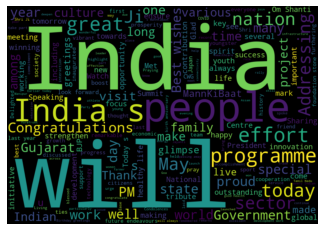

In [45]:
all_words=' '.join([tweets for tweets in df['Tweet']])
wordCloud=WordCloud(width=1000,height=700,random_state=21).generate(all_words)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Finding the Subjectivitiy and Polarity

In [46]:
from textblob import TextBlob
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity
df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df["Tweet"].apply(getPolarity)
df

,Date,User,Tweet,month,Subjectivity,Polarity
0,2022-11-30 11:48:35+00:00,narendramodi,Manipur is known for its vibrant culture. Best...,11,0.316667,0.583333
1,2022-11-30 09:58:55+00:00,narendramodi,"I call upon all ExamWarriors, their parents an...",11,0.650000,0.450000
2,2022-11-30 09:57:49+00:00,narendramodi,A very encouraging trend. Happy to see this ch...,11,0.751111,0.521111
3,2022-11-30 09:57:00+00:00,narendramodi,"Looks great! And, with the new airport and fli...",11,0.585909,0.547273
4,2022-11-29 15:02:24+00:00,narendramodi,Excellent news! _India is a game changer when ...,11,0.508333,0.200000
...,...,...,...,...,...,...
2217,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1,0.000000,0.000000
2218,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1,0.687500,-0.125000
2219,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1,0.466667,0.316667
2220,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1,0.283333,0.112500


Sentiment Analysis

In [47]:
def getSentiment(value):
    if value<0:
        return 'Negative'
    elif value==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment']=df['Polarity'].apply(getSentiment)
df

,Date,User,Tweet,month,Subjectivity,Polarity,Sentiment
0,2022-11-30 11:48:35+00:00,narendramodi,Manipur is known for its vibrant culture. Best...,11,0.316667,0.583333,Positive
1,2022-11-30 09:58:55+00:00,narendramodi,"I call upon all ExamWarriors, their parents an...",11,0.650000,0.450000,Positive
2,2022-11-30 09:57:49+00:00,narendramodi,A very encouraging trend. Happy to see this ch...,11,0.751111,0.521111,Positive
3,2022-11-30 09:57:00+00:00,narendramodi,"Looks great! And, with the new airport and fli...",11,0.585909,0.547273,Positive
4,2022-11-29 15:02:24+00:00,narendramodi,Excellent news! _India is a game changer when ...,11,0.508333,0.200000,Positive
...,...,...,...,...,...,...,...
2217,2022-01-01 08:01:09+00:00,narendramodi,Releasing the 10th instalment under PM-KISAN s...,1,0.000000,0.000000,Neutral
2218,2022-01-01 01:35:09+00:00,narendramodi,Extremely saddened by the loss of lives due to...,1,0.687500,-0.125000,Negative
2219,2022-01-01 01:25:24+00:00,narendramodi,Greetings to our energetic Cabinet colleague S...,1,0.466667,0.316667,Positive
2220,2022-01-01 01:24:53+00:00,narendramodi,Birthday wishes to Manipur’s dynamic Chief Min...,1,0.283333,0.112500,Positive


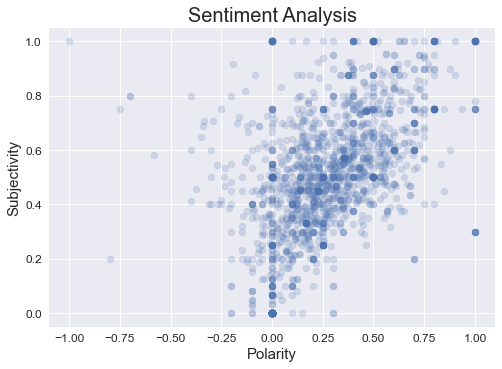

In [48]:
plt.style.use('seaborn')
plt.scatter(df['Polarity'],df['Subjectivity'],alpha=0.2)
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Polarity',fontsize=15)
plt.ylabel('Subjectivity',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

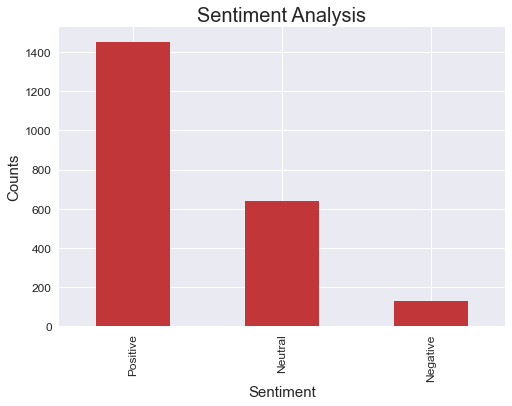

In [49]:
sns.set_palette("RdBu")
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Sentiment',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
